In [1]:
import multipendulum as mp
import multipendulum.diagnostics as diag
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from ipyparallel import Client
clustername = "CQM"
rc = Client(profile=clustername)
len(rc.ids)

80

In [4]:
lbv = rc.load_balanced_view()

## 640 points

In [15]:
iclist = [((theta0, 0.0),(0,0)) for theta0 in np.linspace(0.1, 1.75, 640)]
result = lbv.map_async(diag.sampled_lyapunov_estimate, iclist)

In [16]:
result.wait_interactive()

 640/640 tasks finished after 2941 s
done


In [18]:
data = pd.DataFrame(result.r)

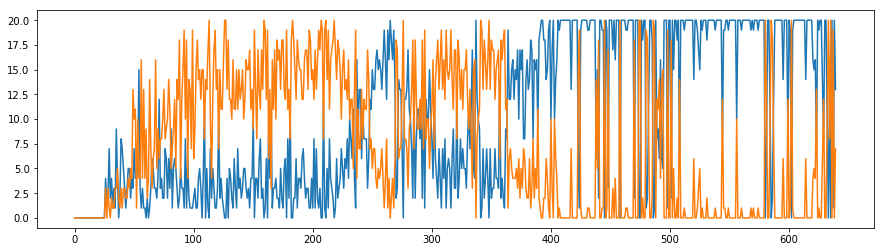

In [26]:
data.lins.plot(figsize=(15,4))
data.logs.plot()

In [27]:
data.to_pickle("theta0-640.pkl")

## 1600 Points

In [6]:
iclist = [((theta0, 0.0),(0,0)) for theta0 in np.linspace(0.1, 1.75, 1600)]
result1600 = lbv.map_async(diag.sampled_lyapunov_estimate, iclist)


In [7]:
result1600.wait_interactive()

1600/1600 tasks finished after 31277 s
done


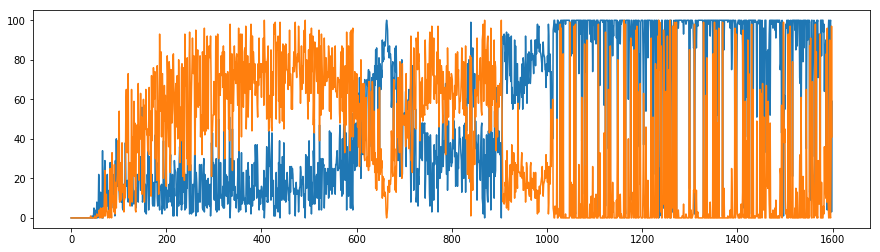

In [8]:
data1600 = pd.DataFrame(result1600.r)
data1600.to_pickle("theta0-1600-100.pkl")
data1600.lins.plot(figsize=(15,4))
data1600.logs.plot()

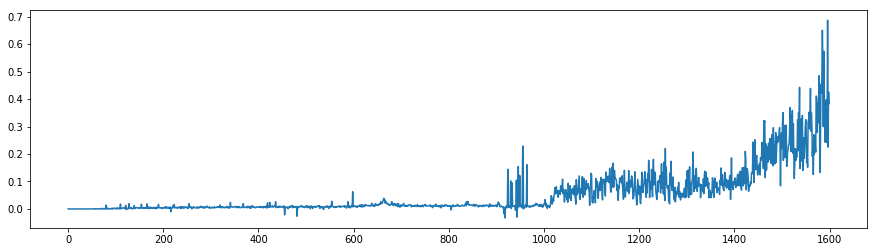

In [35]:
data1600.lmean.plot(figsize=(15,4))

(600, 1000)

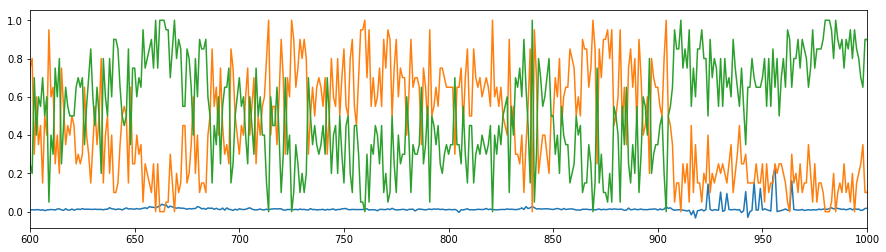

In [40]:
data1600.lmean.plot(figsize=(15,4))
(data1600.logs/20).plot()
(data1600.lins/20).plot()
plt.xlim(600, 1000)

## $\theta_1$ set

In [11]:
iclist = [((0.0, theta1),(0,0)) for theta1 in np.linspace(0.1, 3.1, 1600)]
iclist_80 = [((0.0, theta1),(0,0)) for theta1 in np.linspace(0.1, 3.1, 80)]

In [12]:
def shortwrapper(ic):
    import multipendulum as mp
    
    return mp.sampled_lyapunov_estimate(ic, nperts=20)

In [7]:
shortwrapper(iclist_80[-1])

{'energy': -8.9357030970392426,
 'ic': ((0.0, 1.75), (0, 0)),
 'lins': 10,
 'lmean': 0.025840127781313837,
 'logs': 0,
 'lstd': 0.002259165117265787,
 'pmean': -11.82041672123291,
 'pstd': 0.40316666127076267}

In [8]:

result80_theta1_short = lbv.map_async(shortwrapper, iclist_80)
result80_theta1_short.wait_interactive()

  80/80 tasks finished after  192 s
done


In [13]:
result1600_theta1_short = lbv.map_async(shortwrapper, iclist)
result1600_theta1_short.wait_interactive()

1600/1600 tasks finished after 7334 s
done


In [14]:
data1600 = pd.DataFrame(result1600_theta1_short.r)
data1600.to_pickle("theta1-1600-20.pkl")

In [ ]:
result1600_theta1 = lbv.map_async(mp.sampled_lyapunov_estimate, iclist)
result1600_theta1.wait_interactive()

 240/1600 tasks finished after 3917 s

In [ ]:
data1600 = pd.DataFrame(result1600_theta1.r)
data1600.to_pickle("theta1-1600-100.pkl")